##**Load Dataset**


In [1]:
# import libraries
import pandas as pd
import numpy as np
import glob
import imageio as imageio
import matplotlib.pyplot as plt
import sklearn
import cv2


In [2]:
pip install imageio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import imageio.v2 as imageio

In [4]:
# Downloading Product 1 Dataset
!gdown 1xKn_5YTGzS73pGGAuOUqAtfLMfbOMEbw

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# Downloading Product 2 Dataset
!gdown 11XLnKRoW2WOhCiwPKtzcgZ3gq3aq7K1U

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!unzip Fabric_Final_Dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
project_path = "Fabric_Final_Dataset"


picture shape: (4608, 3456, 3)


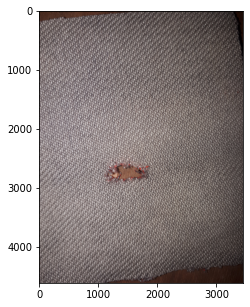

In [8]:
# load a picture
pic = f"{project_path}/hole/20180531_134722.jpg"
im = imageio.imread(pic)
print(f"picture shape: {im.shape}")
# set display size
plt.figure(figsize=(10, 5))
plt.imshow(im, cmap='gray')
plt.show()


In [9]:
def load_file(file_path, label):

    # declare the folder name
    folder_name = file_path.split("/")[-1]
    # declare output list
    out_list = []
    ext = ['png', 'jpg']
    files = []
    [files.extend(glob.glob(f'{file_path}/*.{e}')) for e in ext]
    for image_path in files:
        # read image file
        pic = cv2.imread(image_path, 0)
        # img = imutils.resize(pic, height= 200 ,width=800)
        img = cv2.resize(pic, (345, 245))
        image = img
        # declare temporary dict dtype
        temp = {"name": image_path.split("/")[-1]}
        # set the file label, 0 for non defect. 1 for defect
        temp["label"] = label

        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:
            temp["data"] = image[:, :, 0].astype("int")
        except Exception:
            # normal case
            temp["data"] = image.astype("int")
        # append temp into output list
        out_list.append(temp)
    # print process status by checking size of output list
    if not out_list:
        print(f"loading files from folder: {folder_name} is failed")
    else:
        print(
            f"loading file from folder: {folder_name} is successful, size: {len(files)}")
    # convert list into numpy array dtype
    return np.array(out_list)


###**Prepare file paths**


In [10]:
# All Defect_Images Path
non_defect_images_path = f"{project_path}/defect_free" # non defect images
defect_images_path1 = f"{project_path}/hole"
defect_images_path2 = f"{project_path}/horizontal"
defect_images_path3 = f"{project_path}/lines"
defect_images_path4 = f"{project_path}/stain"
defect_images_path5 = f"{project_path}/verticle"

In [11]:
# Count the pictures in the respective defect category
import os

count_defect_free = len([name for name in os.listdir(
    non_defect_images_path) if os.path.isfile(os.path.join(non_defect_images_path, name))])

count_hole = len([name for name in os.listdir(defect_images_path1)
                 if os.path.isfile(os.path.join(defect_images_path1, name))])

count_horizontal = len([name for name in os.listdir(defect_images_path2)
                 if os.path.isfile(os.path.join(defect_images_path2, name))])

count_lines = len([name for name in os.listdir(defect_images_path3)
                 if os.path.isfile(os.path.join(defect_images_path3, name))])

count_stain = len([name for name in os.listdir(defect_images_path4)
                 if os.path.isfile(os.path.join(defect_images_path4, name))])

count_verticle = len([name for name in os.listdir(defect_images_path5)
                 if os.path.isfile(os.path.join(defect_images_path5, name))])

print(f"Defect Free pictures are: {count_defect_free}")
print(f"Defected Hole pictures are: {count_hole}")
print(f"Defected Horizontal pictures are: {count_horizontal}")
print(f"Defected Lines pictures are: {count_lines}")
print(f"Defected Stain pictures are: {count_stain}")
print(f"Defected Verticle pictures are: {count_verticle}")


Defect Free pictures are: 417
Defected Hole pictures are: 281
Defected Horizontal pictures are: 136
Defected Lines pictures are: 157
Defected Stain pictures are: 398
Defected Verticle pictures are: 101


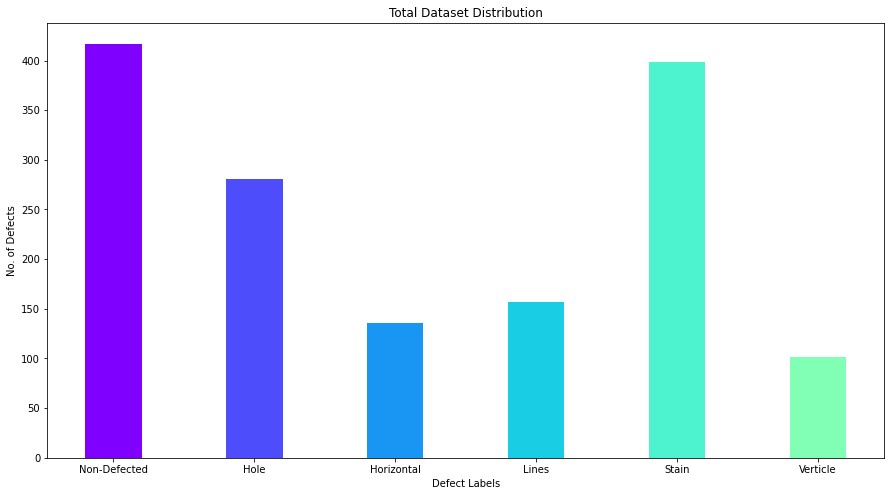

In [12]:
# Plot the Distribution
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

data = {'Non-Defected': count_defect_free, 'Hole': count_hole, 'Horizontal': count_horizontal,
        'Lines': count_lines, 'Stain': count_stain, 'Verticle': count_verticle}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(15, 8))

# creating the bar plot
plt.bar(courses, values, color=cm.rainbow(np.linspace(0, 1, 11)), width=0.4)

plt.xlabel("Defect Labels")
plt.ylabel("No. of Defects")
plt.title("Total Dataset Distribution")
plt.show()


###**Load Files** 


In [13]:
# Here load the files of images
non_defect_images = load_file(file_path=non_defect_images_path, label=0)
defect_images1 = load_file(file_path=defect_images_path1, label=1)
defect_images2 = load_file(file_path=defect_images_path2, label=2)
defect_images3 = load_file(file_path=defect_images_path3, label=3)
defect_images4 = load_file(file_path=defect_images_path4, label=4)
defect_images5 = load_file(file_path=defect_images_path5, label=5)


loading file from folder: defect_free is successful, size: 417
loading file from folder: hole is successful, size: 281
loading file from folder: horizontal is successful, size: 136
loading file from folder: lines is successful, size: 157
loading file from folder: stain is successful, size: 398
loading file from folder: verticle is successful, size: 101


picture shape: (245, 345)


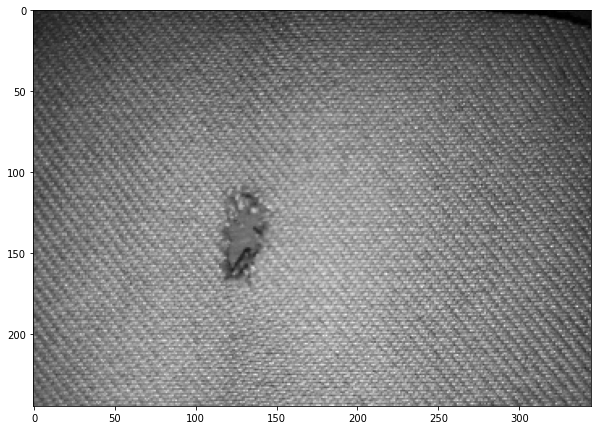

In [14]:
pic = (defect_images1[50]['data'])
im = pic
print(f"picture shape: {im.shape}")
# set display size
plt.figure(figsize=(10, 8))
plt.imshow(im, cmap='gray')
plt.show()


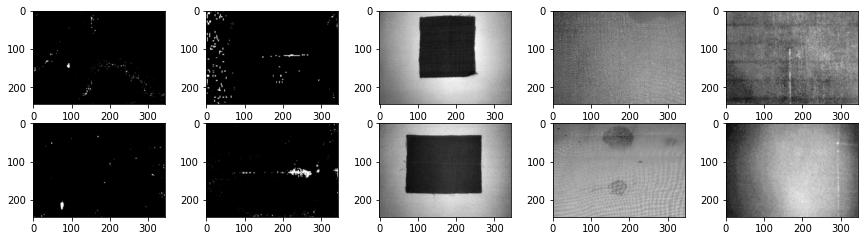

In [15]:
# Show a graph from each defected dataset
pic1 = (defect_images1[10]['data'])
pic2 = (defect_images2[10]['data'])
pic3 = (defect_images3[10]['data'])
pic4 = (defect_images4[4]['data'])
pic5 = (defect_images5[10]['data'])
pic6 = (defect_images1[18]['data'])
pic7 = (defect_images2[18]['data'])
pic8 = (defect_images3[18]['data'])
pic9 = (defect_images4[18]['data'])
pic10 = (defect_images5[18]['data'])

plt.figure(figsize=(15, 10))  # specifying the overall grid size

plt.subplot(5, 5, 1)
plt.imshow(pic1, cmap='gray')


plt.subplot(5, 5, 2)
plt.imshow(pic2, cmap='gray')

plt.subplot(5, 5, 3)
plt.imshow(pic3, cmap='gray')

plt.subplot(5, 5, 4)
plt.imshow(pic4, cmap='gray')


plt.subplot(5, 5, 5)
plt.imshow(pic5, cmap='gray')

plt.subplot(5, 5, 6)
plt.imshow(pic6, cmap='gray')

plt.subplot(5, 5, 7)
plt.imshow(pic7, cmap='gray')

plt.subplot(5, 5, 8)
plt.imshow(pic8, cmap='gray')

plt.subplot(5, 5, 9)
plt.imshow(pic9, cmap='gray')


plt.subplot(5, 5, 10)
plt.imshow(pic10, cmap='gray')


plt.show()


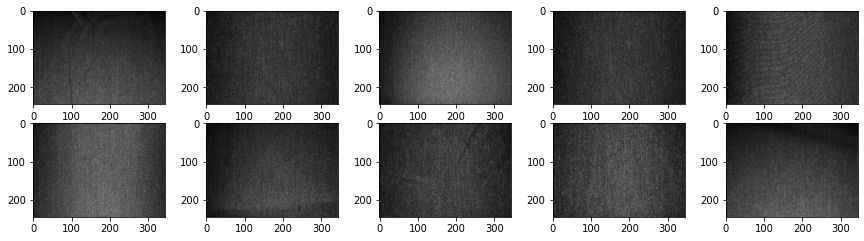

In [16]:
# Show a graph from each non defected dataset
pic1 = (non_defect_images[10]['data'])
pic2 = (non_defect_images[13]['data'])
pic3 = (non_defect_images[12]['data'])
pic4 = (non_defect_images[13]['data'])
pic5 = (non_defect_images[18]['data'])
pic6 = (non_defect_images[15]['data'])
pic7 = (non_defect_images[16]['data'])
pic8 = (non_defect_images[25]['data'])
pic9 = (non_defect_images[45]['data'])
pic10 = (non_defect_images[60]['data'])

plt.figure(figsize=(15, 10))  # specifying the overall grid size

plt.subplot(5, 5, 1)
plt.imshow(pic1, cmap='gray')


plt.subplot(5, 5, 2)
plt.imshow(pic2, cmap='gray')

plt.subplot(5, 5, 3)
plt.imshow(pic3, cmap='gray')

plt.subplot(5, 5, 4)
plt.imshow(pic4, cmap='gray')


plt.subplot(5, 5, 5)
plt.imshow(pic5, cmap='gray')

plt.subplot(5, 5, 6)
plt.imshow(pic6, cmap='gray')

plt.subplot(5, 5, 7)
plt.imshow(pic7, cmap='gray')

plt.subplot(5, 5, 8)
plt.imshow(pic8, cmap='gray')

plt.subplot(5, 5, 9)
plt.imshow(pic9, cmap='gray')


plt.subplot(5, 5, 10)
plt.imshow(pic10, cmap='gray')


plt.show()


In [17]:
# contribute the defect dataset into one file
defect_images = np.concatenate((defect_images1, defect_images2))
defect_images = np.concatenate((defect_images, defect_images3))
defect_images = np.concatenate((defect_images, defect_images4))
defect_images = np.concatenate((defect_images, defect_images5))

In [18]:
print(
    f"defect_images.shape: {defect_images.shape}\nnon_defect_images.shape: {non_defect_images.shape} \n")


defect_images.shape: (1073,)
non_defect_images.shape: (417,) 



##**Data Preparation**


In [19]:
# shuffle the order of defect-free and defect images
np.random.shuffle(non_defect_images)
np.random.shuffle(defect_images)
dataset = np.concatenate((defect_images[:], non_defect_images[:]))
# create an empty matrix X with is matrix of 256x4096 and has dataset length row
X = np.empty([dataset.shape[0], 245, 345]).astype(int)
# create vector y which has dataset length
y = np.empty(dataset.shape[0]).astype(int)
# assign the X,y one-by-one
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]
# since Keras acquire the Image input is a tensor type -> we reshape X
X = X.reshape(X.shape[0], 245, 345, 1)
# display size of the label 0 and label 1
np.unique(y, return_counts=True)


(array([0, 1, 2, 3, 4, 5]), array([417, 281, 136, 157, 398, 101], dtype=int64))

In [20]:
X.shape

(1490, 245, 345, 1)

In [21]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


## **Apply PCA Before Sampling**

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
import umap

In [23]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
X_res = X.reshape(X.shape[0], -1)
y_res = y.ravel()
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X_res)

In [24]:
%pip install nbformat 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.917861   0.01067973]
Total variance explained by the n_components:  0.9285407319221516


In [26]:
my_dict = {0:'defect_free', 1:'hole', 2:'horizontal', 3:'lines', 4:'stain', 5:'verticle'}
y_label = [my_dict[zi] for zi in y_res]

In [27]:
y_label = np.array(y_label)

In [28]:
labels=list(y_label)
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=y_res, colorscale='Rainbow', opacity=0.5),
                                text=[f'defect_code: {a}' for a in labels],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 400, height = 400,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

##**Apply BorderlineSMOTE for Oversampling** \
It is a technique that is used for oversampling the given dataset

In [29]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

In [30]:
# Reshape the given X train for the Random Over sampler technique
X_res = X.reshape(X.shape[0], -1)
y_res = y.ravel()
print(f'Original dataset shape {Counter(y_res)}')

Original dataset shape Counter({0: 417, 4: 398, 1: 281, 3: 157, 2: 136, 5: 101})


In [31]:
ost = BorderlineSMOTE(random_state=42)
X_ost, y_ost = ost.fit_resample(X_res, y_res)

In [32]:
print(f'Resampled dataset shape {Counter(y_ost)}')

Resampled dataset shape Counter({5: 417, 4: 417, 1: 417, 2: 417, 3: 417, 0: 417})


In [33]:
# agian reshape the x random under sample for the cnn
X = X_ost.reshape(X_ost.shape[0], 245, 345, 1)

In [34]:
y = y_ost

## **Apply PCA After Sampling and Before CNN**

In [35]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
X_res = X.reshape(X.shape[0], -1)
y_res = y.ravel()
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X_res)

In [36]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.92250769 0.0089256 ]
Total variance explained by the n_components:  0.9314332904814108


In [37]:
my_dict = {0:'defect_free', 1:'hole', 2:'horizontal', 3:'lines', 4:'stain', 5:'verticle'}
y_label = [my_dict[zi] for zi in y_res]

In [38]:
y_label = np.array(y_label)

In [39]:
labels=list(y_label)
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=y_res, colorscale='Rainbow', opacity=0.5),
                                text=[f'defect_code: {a}' for a in labels],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 400, height = 400,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

##**Build CNN**


In [40]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import datasets, layers, models, optimizers, regularizers, callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [41]:
def create_model(image_shape=(245, 345, 1), print_summary=False):
    # initial model
    model = models.Sequential()

    # CONV layer: filter 16, stride 7x7
    model.add(layers.Conv2D(filters=16, kernel_size=(7, 7),
              input_shape=image_shape, activation='relu', padding='same'))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(32, (5, 5), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # flatten later -> from matrix to vector
    model.add(layers.Flatten())

    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # # fully connected layer -> nn layer with 64 nodes
    # model.add(layers.Dense(64))
    # # Batch Normalization layer -> avoid overfitting
    # model.add(layers.BatchNormalization())
    # # activation layer
    # model.add(layers.Activation('relu'))
    # # droput later -> avoid overfitting
    # model.add(layers.Dropout(0.25))

    # output layer
    model.add(layers.Dense(6, activation='softmax'))

    # set model compiler
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # show the CNN model detail
    if print_summary:
        model.summary()
    return model


create_model(image_shape=(245, 345, 1), print_summary=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 245, 345, 16)      800       
                                                                 
 batch_normalization (BatchN  (None, 245, 345, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 245, 345, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 172, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 122, 172, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 172, 32)      1

##**Training The Model**
In order to train the model the fit() function is called and pass in the chosen parameters.


In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print(
    f"y_train: number of samples each class: {np.unique(y_train, return_counts=True)}")

print(
    f"y_test: number of samples each class: {np.unique(y_test, return_counts=True)}")


y_train: number of samples each class: (array([0, 1, 2, 3, 4, 5]), array([331, 331, 340, 322, 336, 341], dtype=int64))
y_test: number of samples each class: (array([0, 1, 2, 3, 4, 5]), array([86, 86, 77, 95, 81, 76], dtype=int64))


In [44]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [45]:
import time

In [46]:
start = time.time() # Start time
cnn_model = None
cnn_model = create_model(image_shape=(245, 345, 1))
print("Total time taken in creating model: ", time.time() - start, "seconds")

Total time taken in creating model:  0.1780555248260498 seconds


In [47]:

history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=100)


Epoch 1/100
126/126 [==============================] - 161s 1s/step - loss: 1.1743 - accuracy: 0.5502
Epoch 2/100
126/126 [==============================] - 162s 1s/step - loss: 0.8642 - accuracy: 0.6747
Epoch 3/100
126/126 [==============================] - 155s 1s/step - loss: 0.7114 - accuracy: 0.7241
Epoch 4/100
126/126 [==============================] - 150s 1s/step - loss: 0.6315 - accuracy: 0.7601
Epoch 5/100
126/126 [==============================] - 151s 1s/step - loss: 0.5729 - accuracy: 0.7896
Epoch 6/100
126/126 [==============================] - 150s 1s/step - loss: 0.5396 - accuracy: 0.7946
Epoch 7/100
126/126 [==============================] - 150s 1s/step - loss: 0.4751 - accuracy: 0.8271
Epoch 8/100
126/126 [==============================] - 150s 1s/step - loss: 0.4886 - accuracy: 0.8201
Epoch 9/100
126/126 [==============================] - 150s 1s/step - loss: 0.4705 - accuracy: 0.8136
Epoch 10/100
126/126 [==============================] - 150s 1s/step - loss: 0.419

In [48]:
# save trained model and also its history
from keras.models import save_model
save_model(cnn_model, "best_model.h5")
np.save('my_history.npy', history.history)


##**Load Model**


In [49]:
from numpy import loadtxt
from keras.models import load_model
import numpy as np
model = load_model('best_model.h5')
history = np.load('my_history.npy', allow_pickle='TRUE').item()
# summarize model.
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 245, 345, 16)      800       
                                                                 
 batch_normalization_6 (Batc  (None, 245, 345, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 245, 345, 16)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 122, 172, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 122, 172, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 172, 32)     

##**Validate Trained Model**


In [50]:
# Model evaluation
start = time.time() # Start time

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Total time taken for validation: ", time.time() - start, "seconds")


Accuracy: 88.02%
Total time taken for validation:  8.042606592178345 seconds


In [51]:
from sklearn.metrics import classification_report
predIdxs = model.predict(X_test)
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(y_test, predIdxs))

16/16 [==============================] - 7s 433ms/step
              precision    recall  f1-score   support

           0       0.94      0.57      0.71        86
           1       0.75      0.95      0.84        86
           2       0.84      1.00      0.91        77
           3       0.99      0.97      0.98        95
           4       0.88      0.80      0.84        81
           5       0.95      1.00      0.97        76

    accuracy                           0.88       501
   macro avg       0.89      0.88      0.87       501
weighted avg       0.89      0.88      0.87       501



<AxesSubplot:>

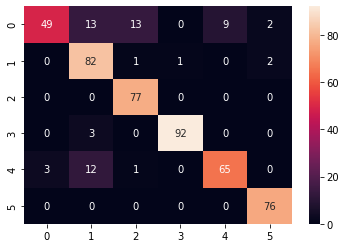

In [52]:
import sklearn.metrics as metrics
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predIdxs)
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

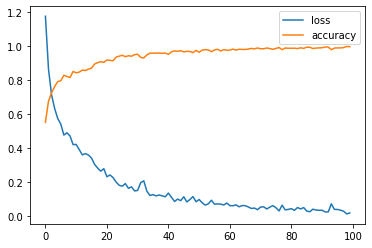

In [53]:
import pandas as pd
pd.DataFrame(history).plot()


##**Testing The Model**
Take a sample image from the dataset and pass it to the model in order to check the model is accurately predicting or not


In [54]:
from tensorflow.keras.preprocessing import image
import numpy as np


def predictImage(filename):
    img1 = filename
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    start = time.time() # Start time
    val = model.predict(X.reshape((1, 245, 345, 1)))
    print("Total time taken for predicting an image: ", time.time() - start, "seconds") 
    val = list(val[0])
    mx = max(val)
    print(f'{mx*100:.2f}% Accurate')
    val = val.index(mx)
    print(f'Label Index is {val}')
    if val == 0:
        plt.xlabel("Non-Defects", fontsize=30)
    elif val == 1:
        plt.xlabel("Hole", fontsize=30)
    elif val == 2:
        plt.xlabel("Horizontal", fontsize=30)
    elif val == 3:
        plt.xlabel("Lines", fontsize=30)
    elif val == 4:
        plt.xlabel("Stain", fontsize=30)
    elif val == 5:
        plt.xlabel("Verticle", fontsize=30)


1/1 [==============================] - 0s 35ms/step
Total time taken for predicting an image:  0.06421518325805664 seconds
100.00% Accurate
Label Index is 2


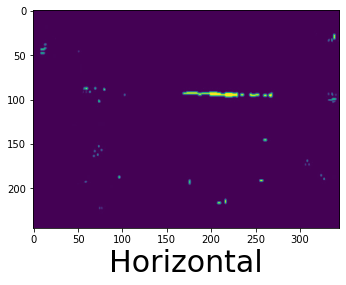

In [55]:
predictImage(X_train[400])


1/1 [==============================] - 0s 38ms/step
Total time taken for predicting an image:  0.06581354141235352 seconds
99.41% Accurate
Label Index is 1


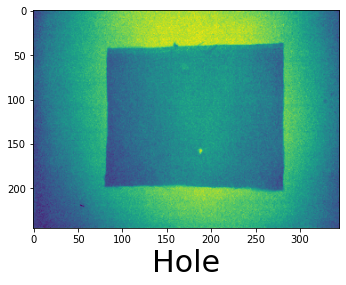

In [56]:
predictImage(X_train[300])


## **Apply PCA After CNN**

In [57]:
# Predict new labels of the data using trained model
predIdxs = model.predict(X)
predIdxs = np.argmax(predIdxs, axis=1)
predIdxs.shape

79/79 [==============================] - 33s 416ms/step


(2502,)

In [58]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
X_res = X.reshape(X.shape[0], -1)
y_res = predIdxs.ravel()
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X_res)

In [59]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.92250769 0.0089256 ]
Total variance explained by the n_components:  0.9314332904814115


In [60]:
my_dict = {0:'defect_free', 1:'hole', 2:'horizontal', 3:'lines', 4:'stain', 5:'verticle'}
y_label = [my_dict[zi] for zi in y_res]

In [61]:
y_label = np.array(y_label)

In [62]:
labels=list(y_label)
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=y_res, colorscale='Rainbow', opacity=0.5),
                                text=[f'defect_code: {a}' for a in labels],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 400, height = 400,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()